# Substance Use and Academic Performance

## Overview



This simulation project examines how alcohol use, marijuana consumption and e-cigarette use influences undergraduate student academic outcomes. Prior research consistently shows that substance use is negatively associated with academic preformance though the effects vary across substances. 

In this simulation, each student is assigned probabilities of using alcohol, nicotine or marijuana based on prevalence rates reported in college-aged samples. GPA outcomes are were generated using effect sizes. BY running the simulation many times, the model estimates a distribution of likely GPA outcomes and highlights how different levels of substance use can shift a student's academic performance.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font='Segoe UI')

from scipy.stats import poisson
import random
import scipy.stats as stats

## Alcohol

The research conducted by the authors of *Assessing Drinking and Academic Performance Among a Nationally Representative Sample of College Students* have a sample of 23,518 undergraduate students complete a questionarrie over their alchol use in social settings to see if there is a significant correlation between academic performance and alchol use (Piazza-Gardner et al., 2016). To replicate this study and compare how often students with different academic performances drink, we used the average amount of drinks each GPA typically has (*4.0 - 2.22*, *3.0 - 3.37*, *2.0 - 3.60*, *1.0 - 3.91*). With these means, we used the famous Poisson distribution to calculate the probability of each GPA having 0 to 10+ drinks and stored these probabilites to use as weights.

To simulate the experiment, we iterated over the range of our sample size and used `random choices` function to randomly picked a student's GPA and then the number of drinks they'll have at a party based on the weighted probability of that GPA. The GPA is also picked using weighted probabilities (*4.0 - 0.27*, *3.0 - 0.38*, *2.0 - 0.21*, *1.0 - 0.14*) as it is far less likely for the average college student to have a 1.0 than it is to have around a 3.0.

In [3]:
# Study Measures
alc_quantity = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10+']
gpa_vals = ['4', '3', '2', '1']

a_probabilities = []
b_probabilities = []
c_probabilities = []
f_probabilities = []

# Estimated probabilities for number of drinks using Poisson distribution and given means
for x in range(len(alc_quantity)-1):
    prob = poisson.pmf(x, mu=2.22)
    a_probabilities.append(prob)
    prob = poisson.pmf(x, mu=3.37)
    b_probabilities.append(prob)
    prob = poisson.pmf(x, mu=3.60)
    c_probabilities.append(prob)
    prob = poisson.pmf(x, mu=3.91)
    f_probabilities.append(prob)

# Probability for 10 or moredrinks
a_probabilities.append(1 - poisson.cdf(9, mu=2.8))
b_probabilities.append(1 - poisson.cdf(9, mu=3.6))
c_probabilities.append(1 - poisson.cdf(9, mu=3.876))
f_probabilities.append(1 - poisson.cdf(9, mu=3.748))

# Simulated Sample Data
n = 23518
data = {'GPA': [], 'Number of Drinks': []}
for student in range(n):
    gpa = random.choices(gpa_vals, weights=[0.27, 0.38, 0.21, 0.14])[0]
    if gpa == '4':
        drinks = random.choices(alc_quantity, weights=a_probabilities)[0]
    elif gpa == '3':
        drinks = random.choices(alc_quantity, weights=b_probabilities)[0]
    elif gpa == '2':
        drinks = random.choices(alc_quantity, weights=c_probabilities)[0]
    else:
        drinks = random.choices(alc_quantity, weights=f_probabilities)[0]
    data['GPA'].append(gpa)
    data['Number of Drinks'].append(drinks)

#### *Distribution of the Number of Drinks Consumed by GPA:*

Text(0.5, 1.0, 'Distribution of the Number of Drinks Consumed by GPA')

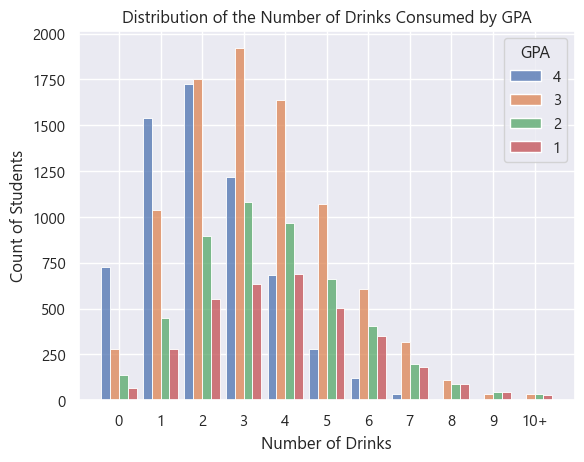

In [4]:
# convert data dict to DataFrame and ensure categorical ordering for the x-axis
alc_df = pd.DataFrame(data)
alc_df['Number of Drinks'] = pd.Categorical(alc_df['Number of Drinks'], categories=alc_quantity, ordered=True)
alc_df['GPA'] = pd.Categorical(alc_df['GPA'], categories=gpa_vals, ordered=True)

sns.histplot(data=alc_df, x='Number of Drinks', hue='GPA', multiple='dodge', shrink=0.85, hue_order=gpa_vals)
plt.ylabel('Count of Students')
plt.title("Distribution of the Number of Drinks Consumed by GPA")

The distribution above shows that as a collective whole, undergraduate students have around 2-4 drinks at social events. The histogram has a right-skewed distribution which highlights that very few students report that they consume an extereme amount of alcohol at parties. 

The likelihood for each number of drinks changes slighty based on the student's GPA as expected. For example, students with 4.0's are the most likely to have one or less drinks and the least likely to have 10+ drinks. To clearly compare the differences between academic performances, a small multiple plot is created in the next code block.

##### *Small Multiple Plot:*

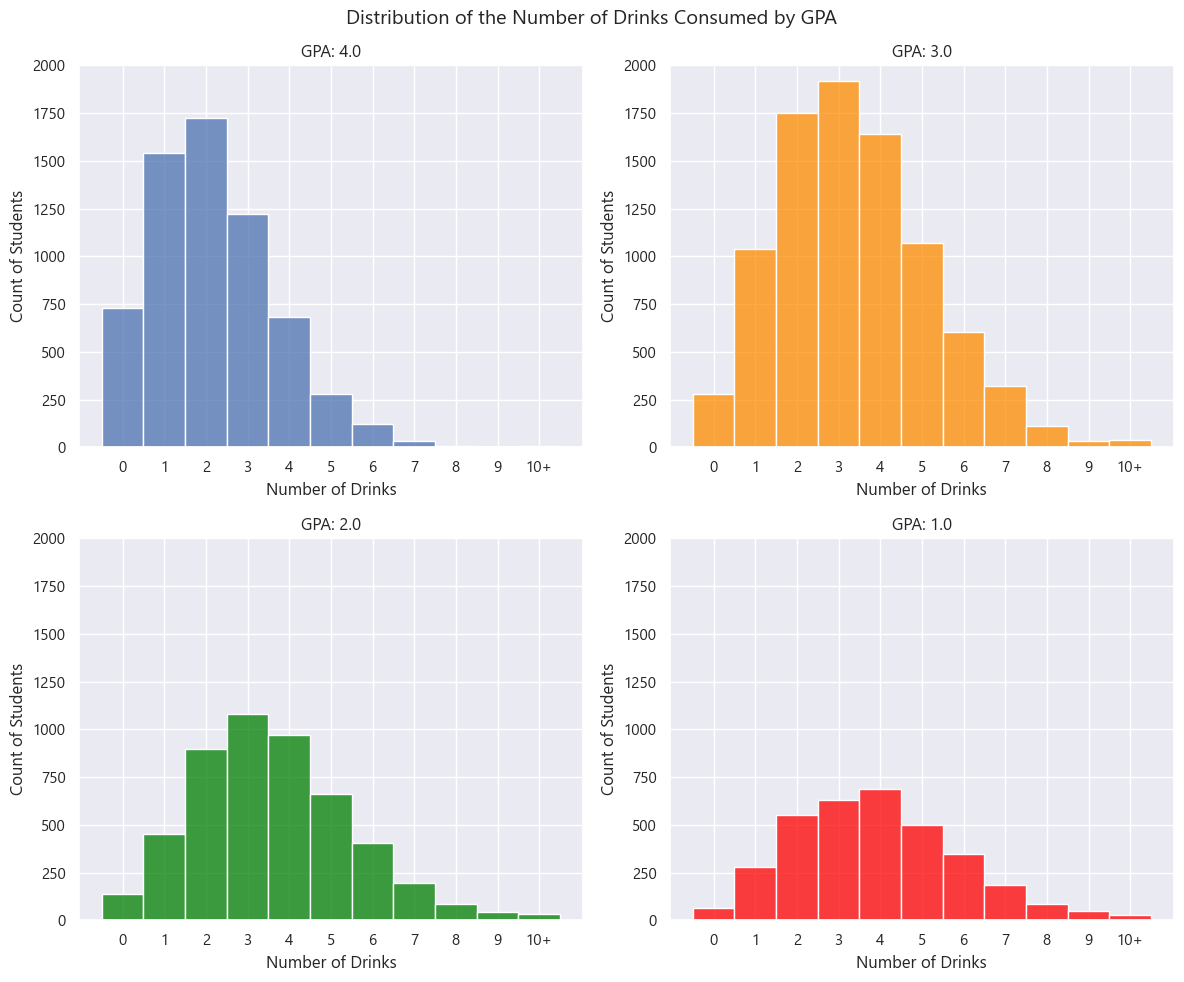

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(data=alc_df[alc_df['GPA'] == '4'], x='Number of Drinks',ax=axs[0,0])
axs[0,0].set_title('GPA: 4.0')
axs[0,0].set_ylabel('Count of Students')
axs[0,0].set_ylim(0, 2000)

sns.histplot(data=alc_df[alc_df['GPA'] == '3'], x='Number of Drinks',ax=axs[0,1], color = 'darkorange')
axs[0,1].set_title('GPA: 3.0')
axs[0,1].set_ylabel('Count of Students')
axs[0,1].set_ylim(0, 2000)

sns.histplot(data=alc_df[alc_df['GPA'] == '2'], x='Number of Drinks', ax=axs[1,0], color = 'green')
axs[1,0].set_title('GPA: 2.0')
axs[1,0].set_ylabel('Count of Students')
axs[1,0].set_ylim(0, 2000)

sns.histplot(data=alc_df[alc_df['GPA'] == '1'], x='Number of Drinks', ax=axs[1,1], color = 'red')
axs[1,1].set_title('GPA: 1.0')
axs[1,1].set_ylabel('Count of Students')
axs[1,1].set_ylim(0, 2000)

plt.suptitle("Distribution of the Number of Drinks Consumed by GPA")
plt.tight_layout()

***GPA of 4.0:***
Students with about a 4.0 on average have about 2 drinks at social settings, alligning with the research conducted by Piazza-Gardner et al.. Unlike the other GPA's, the amount of students who drink each amount begins to decrease after 2 drinks. Additionally, there are virtually no students with a 4.0 GPA are drinking 8 or more drinks. Most students that choose not to drink at parties or limit themselves to 1 also have a 4.0. This is the most skewed to the right which highlights that they seem to drink the least at social settings.

***GPA of 3.0:***
Students with a 3.0 have about 2-4 drinks on average at social settings, with 3 being the most likely number for this group. As this GPA is most common for students, this group has the highiest proportion seen. The difference between the number of 3.0 and 4.0 students having one drink is pretty notable, as there are more 3.0 students but still have far less students drinking one drink than 4.0 students. This shows that they are more likely to consume a greater amount of alchol, aligning with the theory that are alcohol consumption increases, academic performance tends to decrease.

***GPA of 2.0:***
Similar to the previous group, students with a 2.0 have about 2-4 drinks on average at social settings, with 3 being the most likely number for this group. Because it is almost as likely for a random student to have a 4.0 as it is to have a 2.0 (.27 vs .21 likelihood), the differences between these two plots is pretty notable. While it is still a right-skewed distribution, the skew is less strong for 2.0 students as a decent amount of students are drinking 6 or more drinks. This is simply not the case for students with 4.0's as the number of drinks drastically decreases after 4. Additionally, very few students with 2.0's aren't drinking at all, further highlighting the disparity.

***GPA of 1.0:***
Students with a 1.0 have about 3-4 drinks at social settings, with 3 drinks being margianally most likely. While this is the smallest group of students, the minimal difference in the number who drink 3 verus 4 drinks is notable, as the other groups easily leaned more towards having 3 on average. This distribution is the least right skewed which alligns with the idea that students with lower GPAs tend to drink more.

The distributions of each GPA led us to believe that it is probable that **academic performance and alcohol consumption have an *inverse* relationship**.
\
\
\
\
While the sample size is sufficently sized, we wanted to see if simulating the experiment several times would change our results. The next section of code tests that out by running the experimant 100 times and concatinating the results in one large data frame.

### *Simulate the Experiment 100 Times:*

In [6]:
trial_data = []
for i in range(101):
    n = 23518
    data = {'GPA': [], 'Number of Drinks': []}
    for student in range(n):
        gpa = random.choices(gpa_vals, weights=[0.27, 0.38, 0.21, 0.14])[0]
        if gpa == '4':
            drinks = random.choices(alc_quantity, weights=a_probabilities)[0]
        elif gpa == '3':
            drinks = random.choices(alc_quantity, weights=b_probabilities)[0]
        elif gpa == '2':
            drinks = random.choices(alc_quantity, weights=c_probabilities)[0]
        else:
            drinks = random.choices(alc_quantity, weights=f_probabilities)[0]
        data['GPA'].append(gpa)
        data['Number of Drinks'].append(drinks)

    trial_data.append(data)

Text(0.5, 1.0, 'Distribution of the Number of Drinks Consumed by GPA')

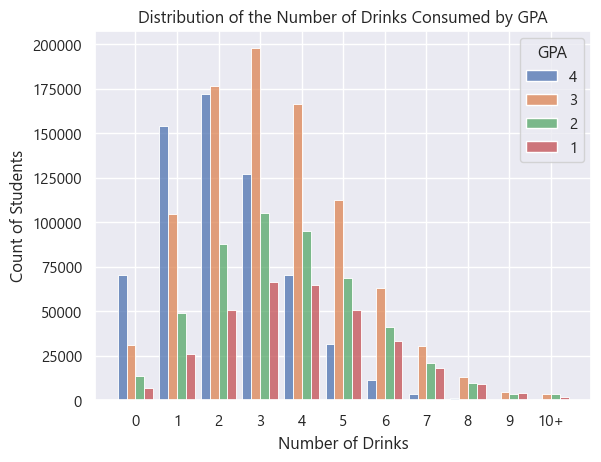

In [7]:
simulated_data = pd.concat([pd.DataFrame(d) for d in trial_data])
simulated_data['Number of Drinks'] = pd.Categorical(simulated_data['Number of Drinks'], categories=alc_quantity, ordered=True)

sns.histplot(data=simulated_data, x='Number of Drinks', hue='GPA', multiple='dodge', shrink=0.85, hue_order=gpa_vals)
plt.ylabel('Count of Students')
plt.title("Distribution of the Number of Drinks Consumed by GPA")

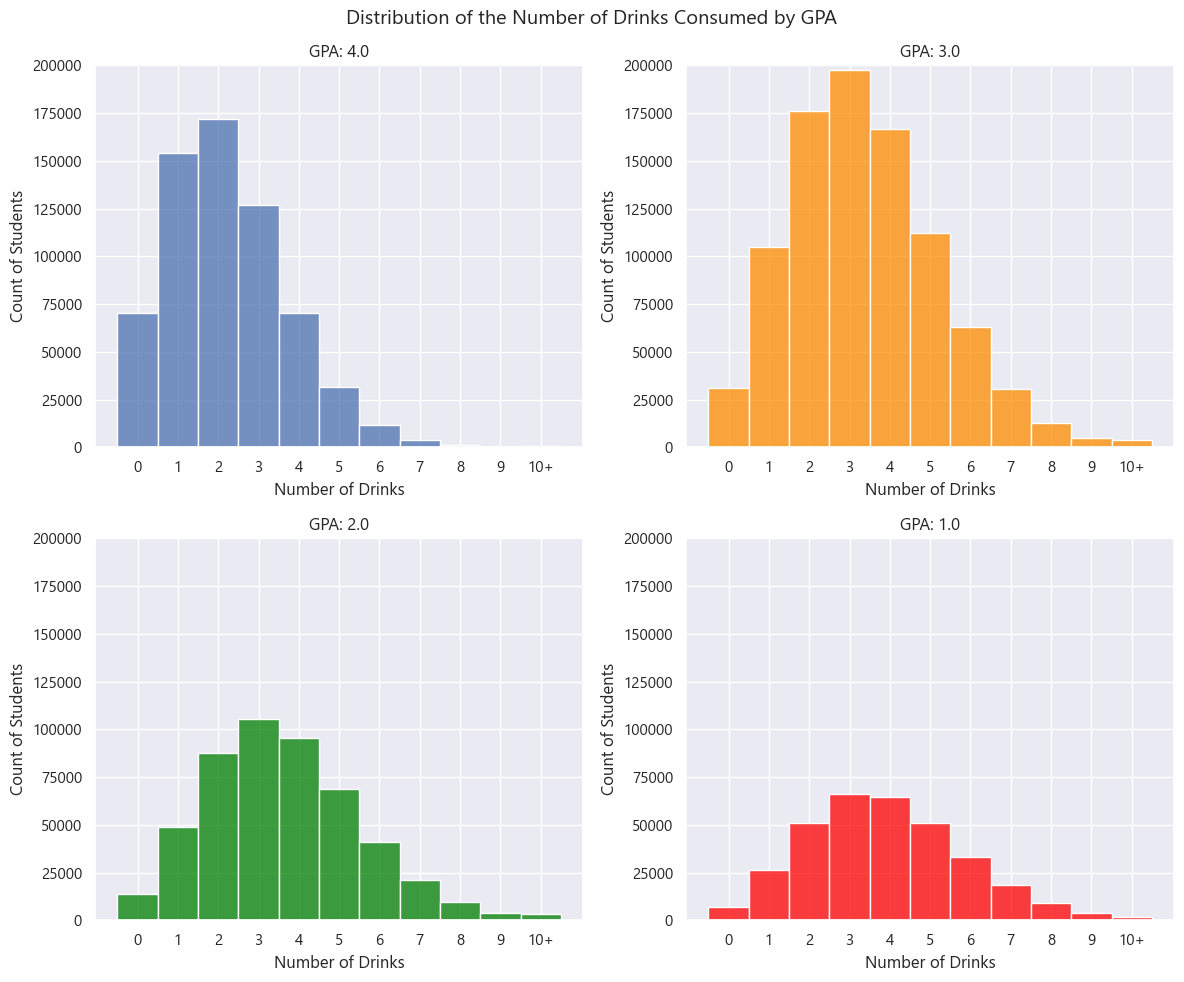

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(data=simulated_data[simulated_data['GPA'] == '4'], x='Number of Drinks',ax=axs[0,0])
axs[0,0].set_title('GPA: 4.0')
axs[0,0].set_ylabel('Count of Students')
axs[0,0].set_ylim(0, 200000)

sns.histplot(data=simulated_data[simulated_data['GPA'] == '3'], x='Number of Drinks',ax=axs[0,1], color = 'darkorange')
axs[0,1].set_title('GPA: 3.0')
axs[0,1].set_ylabel('Count of Students')
axs[0,1].set_ylim(0, 200000)

sns.histplot(data=simulated_data[simulated_data['GPA'] == '2'], x='Number of Drinks', ax=axs[1,0], color = 'green')
axs[1,0].set_title('GPA: 2.0')
axs[1,0].set_ylabel('Count of Students')
axs[1,0].set_ylim(0, 200000)

sns.histplot(data=simulated_data[simulated_data['GPA'] == '1'], x='Number of Drinks', ax=axs[1,1], color = 'red')
axs[1,1].set_title('GPA: 1.0')
axs[1,1].set_ylabel('Count of Students')
axs[1,1].set_ylim(0, 200000)

plt.suptitle("Distribution of the Number of Drinks Consumed by GPA")
plt.tight_layout()

As each plot has the same distributuion as when ran once, we found that the experiment conducted by Piazza-Gardner et al. is sufficient enough to replicate the results in one singular trial.

## Marijuana

This simulation was based on the peer reviewed article, 
The Academic Consequences of Marijuana Use During College. 
The study was conducted using a limited sample size of 1253 young adults whose colleges could 
verify their graduation and GPA data. The data was collected during eight annual assesments
starting with the baseline assesment sometime during their first year of college. The assesments
consisted of a two hour personal interview and self administered questionnaire covering substance use
and academic behavior. In order to recreate this study we used the average days per month noted in the
study (Arria, Caldeira, Bugbee, Vincent, & O’Grady, 2015) along with the average gpa of 

In [9]:
def plot_usage_vs_gpa(         #set parameters
    N=100000,
    beta_mj_to_skip=0.5,
    beta_skip_to_gpa=-0.3,
    mean_mj=3.3,
    mean_skip=.1,
    mean_gpa=3.1,
    noise_skip=0.8,
    noise_gpa=0.25,
    seed=None
):
  
    marijuana = np.random.normal(mean_mj, 1.0, N)
    marijuana = np.clip(marijuana, 0, 30)

    skip = mean_skip + beta_mj_to_skip * marijuana + np.random.normal(0, noise_skip, N)   #mean,std,size
    skip = np.clip(skip, 0, 10)

    gpa = mean_gpa + beta_skip_to_gpa * skip + np.random.normal(0, noise_gpa, N)
    gpa = np.clip(gpa, 0, 4)

    df = pd.DataFrame({
        "Marijuana Use": marijuana,
        "Skipping Class": skip,
        "GPA": gpa
    })


    def categorize_gpa(g):       #define gpa categories
        if g >= 3.1:
            return 4
        elif g >= 2.5:
            return 3
        elif g >= 1.9:
            return 2
        else:
            return 1

    df["GPA_numeric"] = df["GPA"].apply(categorize_gpa)

    # Marijuana usage bins: 0,1,2,3,4,5,6,7+
    bins = [0, 1, 2, 3, 4, 5, 6, 7, np.inf]
    labels = ["0", "1", "2", "3", "4", "5", "6", "7+"]
    df["usage_bin"] = pd.cut(df["Marijuana Use"], bins=bins, labels=labels, right=False)

    # Group and calculate percent
    df_grouped = df.groupby(["usage_bin", "GPA_numeric"]).size().reset_index(name="count")
    df_grouped["percent"] = df_grouped.groupby("usage_bin", observed=True)["count"].transform(lambda x: 100 * x / x.sum())

    # Plot
    plt.figure(figsize=(14,6))
    sns.barplot(data=df_grouped, x="usage_bin", y="percent", 
                hue="GPA_numeric", hue_order=[4,3,2,1],
               palette=["blue", "orange", "green", "red"])

    plt.xlabel("Marijuana Use Frequency (times/month)")
    plt.ylabel("Percent of Students")
    plt.title("GPA Distribution by Marijuana Use Frequency")
    plt.legend(title="GPA")
    plt.tight_layout()


C:\Users\Emma\AppData\Local\Temp\ipykernel_4824\3453200090.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby(["usage_bin", "GPA_numeric"]).size().reset_index(name="count")


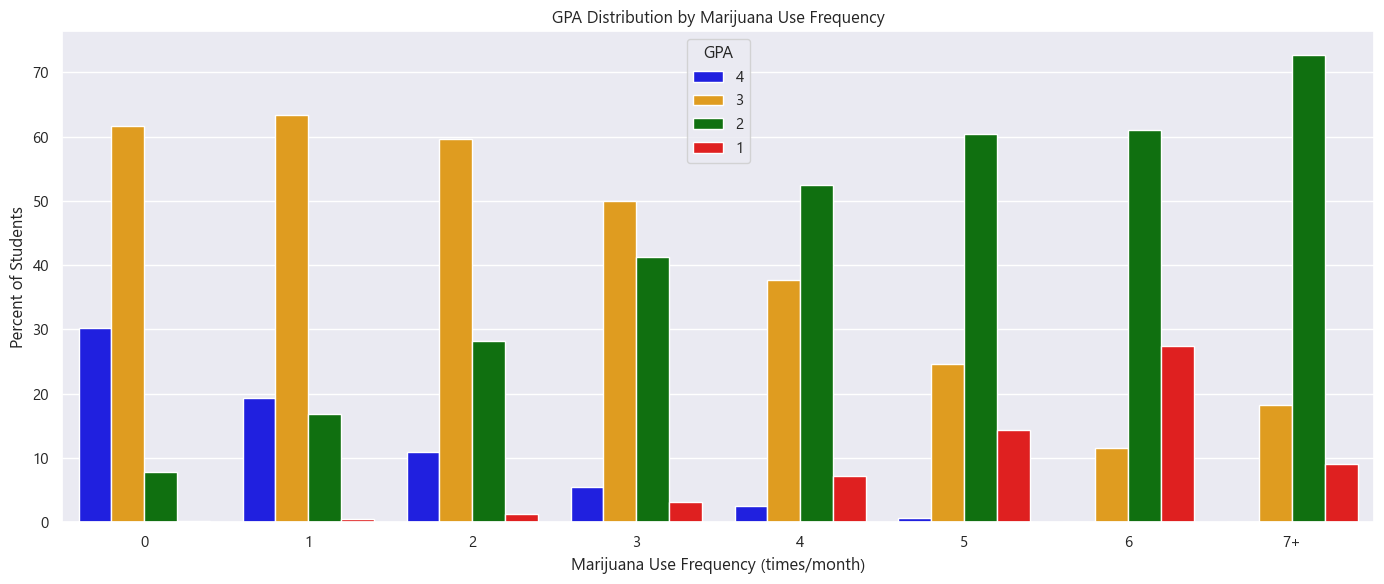

In [10]:
plot_usage_vs_gpa()


KeyboardInterrupt



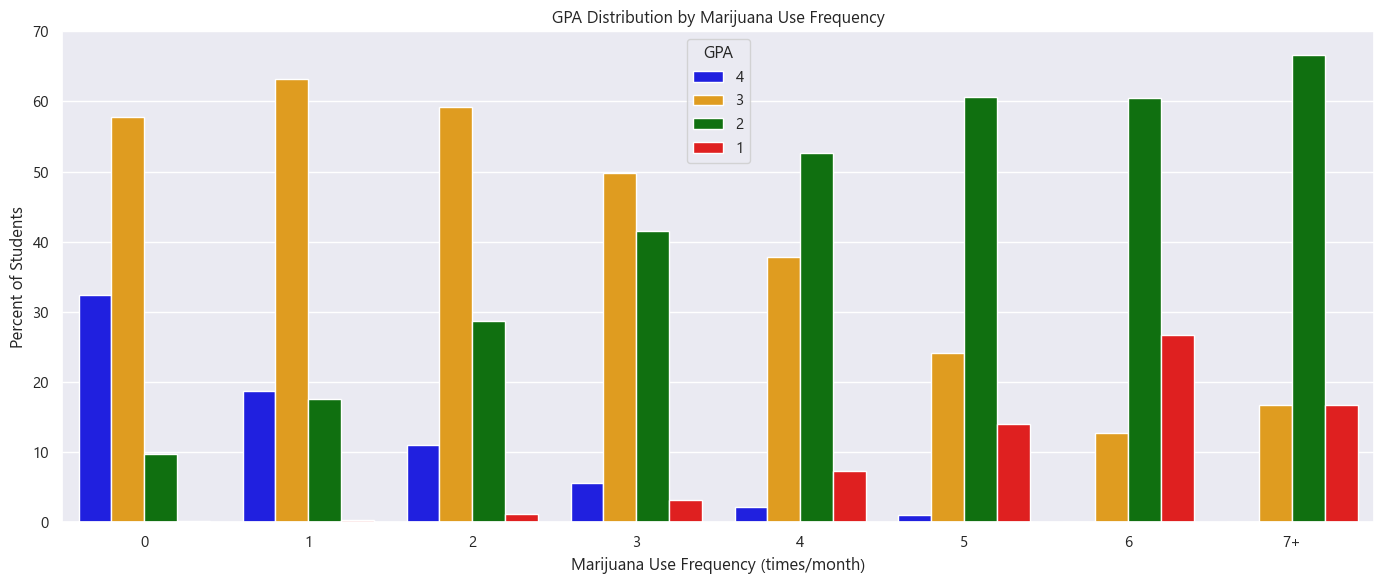

In [11]:
import warnings
warnings.filterwarnings("ignore")

simulations = 100
all_sim_results = []

for sim in range(simulations):
    df_sim = plot_usage_vs_gpa()   # now returns a DataFrame
    df_sim["sim"] = sim + 1
    all_sim_results.append(df_sim)

all_sim_df = pd.concat(all_sim_results, ignore_index=True)

plt.figure(figsize=(14,7))
sns.barplot(
    data=all_sim_df,
    x="usage_bin",            # or "usage" if you renamed it in the function
    y="percent",
    hue="GPA_numeric",
    hue_order=[4,3,2,1],
    palette="tab10",
    ci="sd"
)
plt.xlabel("Vaping Frequency")
plt.ylabel("Average Percent of Students")
plt.title("Average GPA Distribution Across 100 Simulations")
plt.xticks(rotation=45)
plt.legend(title="GPA")
plt.tight_layout()


## Vaping

In a research study conducted by the School of Graduate Studies at East Tennessee State University, the experimenters investigated the relationship between academic outcomes like GPA (grade point average), and specific deterimental and beneficial health choices, like e-cigarette consumption and exercise. Using the National College Health Assessment (NCHA), a survey that collects data on students' health behaviors, the sample for this study included 426,425 undergraduates from over 650 colleges. 

The survey questions specifically for the vaping section, asked students how often they used an e-cigarette in the past 30 days. The frequencies ranged from Never used, Have used but not in the last 30 days, 1-2 days, 3-5 days, 6-9 days, 10-19 days, 20-29 days, and used daily. The study compared these frequencies with the students final course grades.

To simulate the experiment, the function random.choices from the NumPy library was used. This function took the probabilities of students being in a specific vaping frequency, then assigned the students a category. Based on the category they were assigned, if they had vaped within the 30 day period they were assigned a letter grade on the GPA scale (A, B, C, D).


In [3]:
def simulate_vaping_gpa(N=426425):
    categories = [
        "Never", "Not last 30 days", "1-2 days", "3-5 days",
        "6-9 days", "10-19 days", "20-29 days", "Daily"
    ]
    probs = np.array([0.814, 0.102, 0.025, 0.010, 0.007, 0.007, 0.018, 0.018])
    probs = probs / probs.sum()
    
    
    P_yes = np.array([0.376, 0.485, 0.128, 0.011])
    P_no = np.array([0.475, 0.434, 0.086, 0.005])
    gpa_keys = np.array(["A", "B", "C", "D/F"])
    gpa_map = {"A":4, "B":3, "C":2, "D/F":1}
    
    yes_set = {"1-2 days", "3-5 days", "6-9 days", "10-19 days", "20-29 days", "Daily"}
    
    # Simulate usage
    usage = np.random.choice(categories, size=N, p=probs)

    yes_mask = np.isin(usage, list(yes_set))
    grades = np.empty(N, dtype=object)

    grades[yes_mask] = np.random.choice(gpa_keys, size=yes_mask.sum(), p=P_yes)
    grades[~yes_mask] = np.random.choice(gpa_keys, size=(~yes_mask).sum(), p=P_no)

    gpa_numeric = np.vectorize(gpa_map.get)(grades)
    
    
    
    df = pd.DataFrame({"usage": usage, "GPA_numeric": gpa_numeric})
    
    # Ordered categories
    df["usage"] = pd.Categorical(df["usage"], categories=categories, ordered=True)
    gpa_order = [4, 3, 2, 1]
    df["GPA_numeric"] = pd.Categorical(df["GPA_numeric"], categories=gpa_order, ordered=True)
    
    # Compute percentages
    percent_df = (
        df.groupby(["usage", "GPA_numeric"])
          .size()
          .reset_index(name="count")
    )
    percent_df["percent"] = percent_df.groupby("usage")["count"].transform(lambda x: 100 * x / x.sum())
    
    return percent_df

C:\Users\Emma\AppData\Local\Temp\ipykernel_6124\2076962656.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["usage", "GPA_numeric"])
C:\Users\Emma\AppData\Local\Temp\ipykernel_6124\2076962656.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percent_df["percent"] = percent_df.groupby("usage")["count"].transform(lambda x: 100 * x / x.sum())


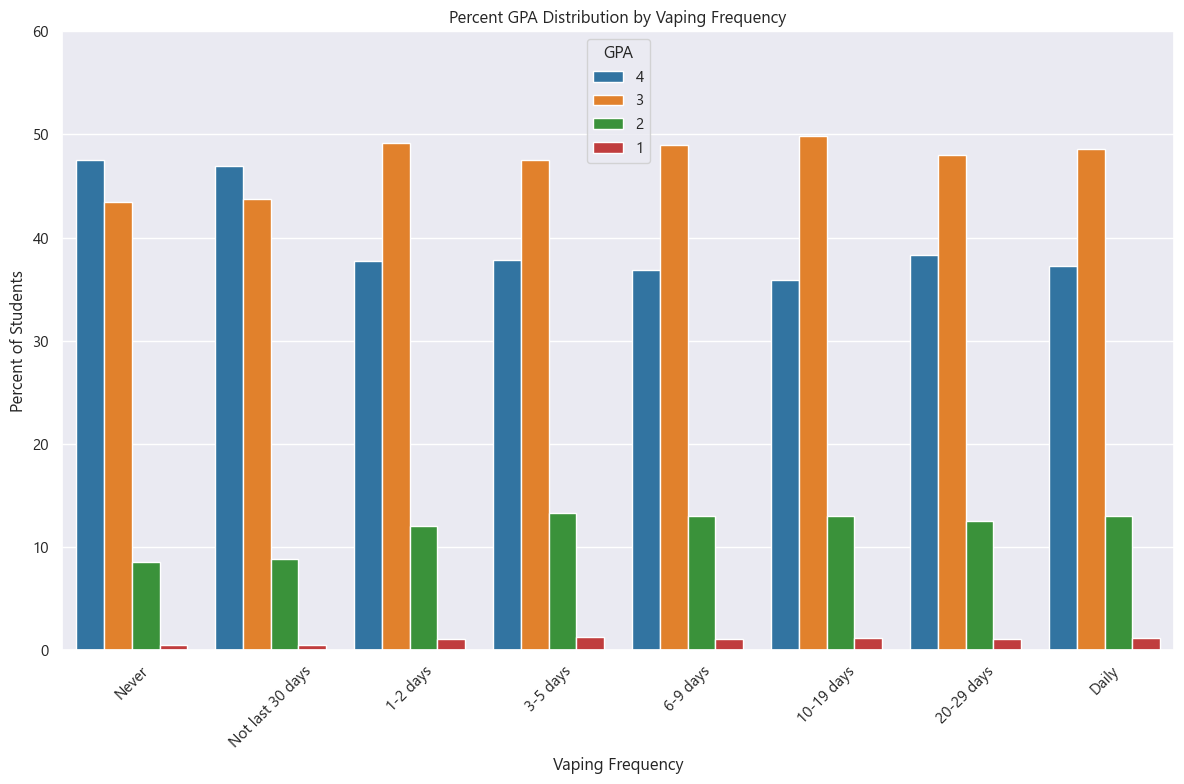

In [4]:
df_sim = simulate_vaping_gpa()

gpa_order = [4, 3, 2, 1]
plt.figure(figsize=(12,8))
sns.barplot(data=df_sim, x="usage", y="percent", hue="GPA_numeric", hue_order = gpa_order, palette= "tab10")

plt.xlabel("Vaping Frequency")
plt.ylabel("Percent of Students")
plt.title("Percent GPA Distribution by Vaping Frequency")
plt.xticks(rotation=45)
plt.legend(title="GPA")
plt.tight_layout()
plt.ylim(0, 60)
plt.show()

Based on the Barplot, we see that students who have never vaped or have not vaped in the last 30 days had the largest percentage of GPAs that were a 4.0. This group also had the smallest amount of GPAs that ranged from a 2.0-1.0. 

As we increase the frequency of e-cigarette usage, we see the percentage of Bs increasing, mostly staying consistent from 1-2 days to Daily usage. 

Based on this singular study, we see that GPA, specifically a 4.0 GPA, correlates with e-cigarette usage.

## Simulate the Experiment 100 Times

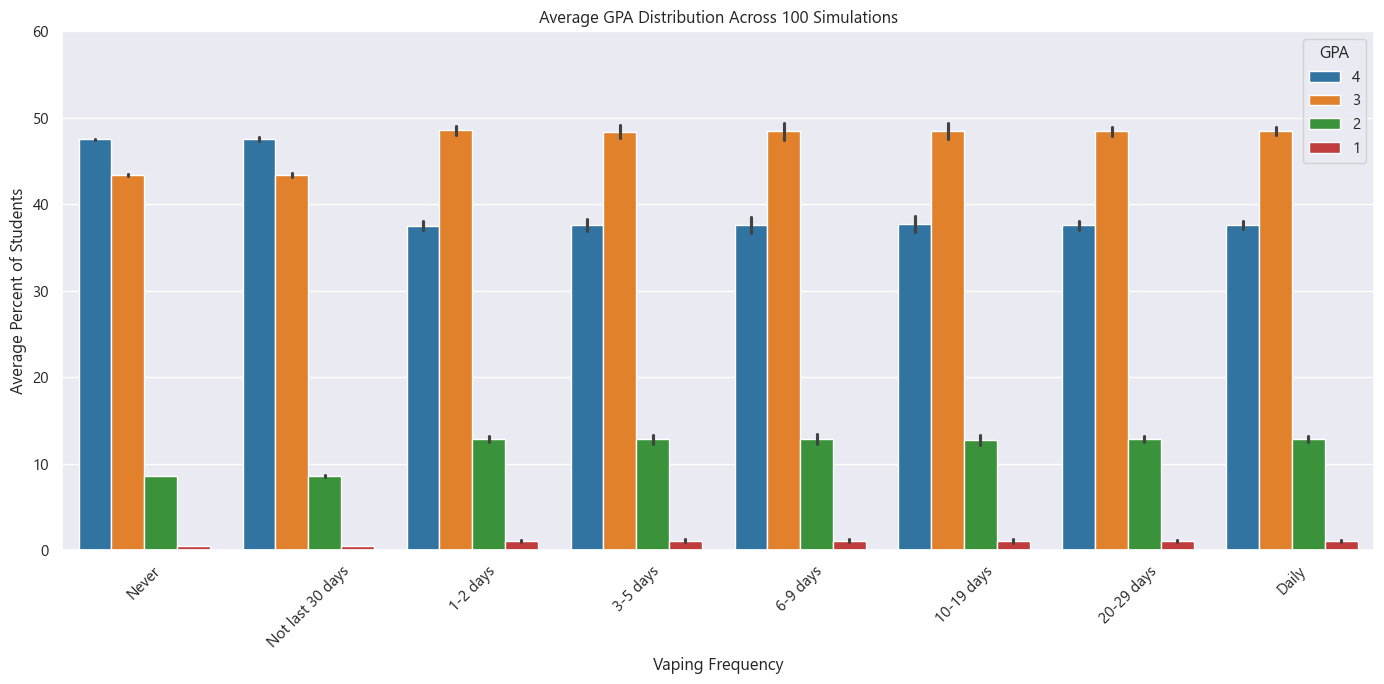

In [5]:
import warnings
warnings.filterwarnings("ignore")

simulations = 100
all_sim_results = []

for sim in range(simulations):
    df_sim = simulate_vaping_gpa()
    df_sim["sim"] = sim + 1
    all_sim_results.append(df_sim)

# Combine all simulations
all_sim_df = pd.concat(all_sim_results)

plt.figure(figsize=(14,7))
sns.barplot(
    data=all_sim_df,
    x="usage",
    y="percent",
    hue="GPA_numeric",
    hue_order=[4,3,2,1],
    palette="tab10",
    ci="sd"   # compute standard deviation automatically
)

plt.xlabel("Vaping Frequency")
plt.ylabel("Average Percent of Students")
plt.title("Average GPA Distribution Across 100 Simulations")
plt.xticks(rotation=45)
plt.legend(title="GPA")
plt.tight_layout()
plt.ylim(0,60)
plt.show()

**4.0 GPA**: Students who have a 4.0 GPA are most likely to have not vaped in the past 30 days. One different finding when comparing the single study and the simulations is those in the "Not in the last 30 Days" category were slightly more likely to receive a 4.0 then those who have never vaped, but again this difference is very slight. As the frequency of vaping continues, the distribution of 4.0 GPAs stays consistent with larger error bars. 

**3.0 GPA**: Students who have a 3.0 GPA are more likely to have vaped within the last 30 days. We see the highest percentage of 3.0s in the 6-9 days category, but overall the percentages are similar between the frequency groups.

**2.0 GPA**: Again we see that those who have a 2.0 GPA are more likely to have used an e-cigarette in the past 30 days. The highest percentage of 2.0s is in the 10-19 days category, but overall the pattern is similar.

**1.0 GPA**: Students who have a 1.0 GPA are more likely to have used an e-cigarette in the past 30 days. The highest percentage of 1.0s is in the 6-9 day category, but overall the pattern is similar. The 1.0 GPA group is the smallest mostly due to the small population of students who have a 1.0 GPA combined with the small population of college students who have reported vaping.

Overall, the biggest differences in GPA are seen between the group of those who have reported e-cigarette use in the last 30 days and those who have not. Those who have used an e-cigarettee are more likely to receieve a 3.0 or 2.0 GPA and those who have not reported e-cigarete usage are more likely to have a 4.0 GPA.



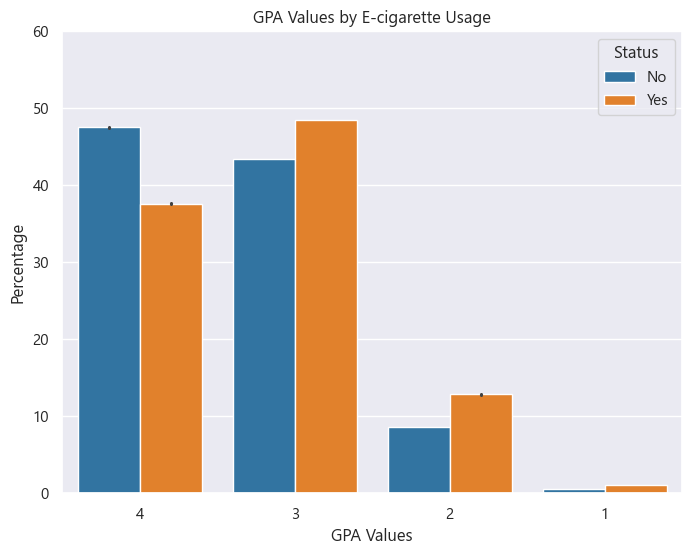

In [8]:
yes_freq = ["1-2 days", "3-5 days", "6-9 days", "10-19 days", "20-29 days", "Daily"]
yes_sim_df = all_sim_df[all_sim_df["usage"].isin(yes_freq)]
yes_sim_df["Status"] = "Yes"

no_freq = ["Never", "Not last 30 days"]
no_sim_df = all_sim_df[all_sim_df["usage"].isin(no_freq)]
no_sim_df["Status"] = "No"

sims_df = pd.concat([no_sim_df,yes_sim_df] )
sims_df

plt.figure(figsize= (8, 6))
sns.barplot(data= sims_df, x = "GPA_numeric", y = "percent", hue= "Status", hue_order= ["No", "Yes"], palette = "tab10")
plt.title("GPA Values by E-cigarette Usage")
plt.xlabel("GPA Values")
plt.ylabel("Percentage")
plt.ylim(0, 60)
sns.set_style("whitegrid")
sns.set_context("talk")



## Comparison

[Comparison Paragraph]

In [ ]:
# Alcohol Statistical Significance Testing
alc_df['gpa_num'] = alc_df['GPA'].map({'4':4, '3':3, '2':2, '1':1})
alc_df['drinks_num'] = alc_df['Number of Drinks'].map({'0':0, '1':1, '2':2, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9, '10+':10})

r, p_val = stats.pearsonr(alc_df['drinks_num'], alc_df['gpa_num'])
print(f"ALCOHOL SIGNIFICANCE: \nPearson correlation coefficient: {r:.4f}, p-value: {p_val}\n\n")


ALCOHOL SIGNIFICANCE: 
Pearson correlation coefficient: -0.2999, p-value: 0.0




In [10]:
## Vaping Significance Testing:
#spearmanr test between vaping (higher frequency means a higher values) and gpa
sims_df["usage_clean"] = (
    sims_df["usage"]
        .astype(str)
        .str.lower()
        .str.strip()
        .str.replace("–", "-", regex=False)   # replace long dash
        .str.replace("—", "-", regex=False)   # replace em dash
)
usage_map = {
    "never": 0,
    "not last 30 days": 1,
    "1-2 days": 2,
    "3-5 days": 3,
    "6-9 days": 4,
    "10-19 days": 5,
    "20-29 days": 6,
    "daily": 7
}
sims_df["usage_num"] = sims_df["usage_clean"].map(usage_map)

corr, p = stats.spearmanr(sims_df["GPA_numeric"], sims_df["usage_num"])

#spearmanr test between GPA and vaping 

status_map = {"No" : 0, "Yes" : 1}
sims_df["Status"] = sims_df["Status"].map(status_map)
corr2, p2 = stats.pearsonr(sims_df["GPA_numeric"], sims_df["usage_num"])

print(f"E-CIGARETTE SIGNIFICANCE \nSpearman's Correlation Vaping Freq vs GPA \n Correlation: {corr}, p-value: {p}\nPearson: Vaping and Non-Vaping vs GPA\n Correlation: {corr2}, P-value: {p2}")



E-CIGARETTE SIGNIFICANCE 
Spearman's Correlation Vaping Freq vs GPA 
 Correlation: 0.0, p-value: 1.0
Pearson: Vaping and Non-Vaping vs GPA
 Correlation: 0.0, P-value: 1.0000000000000004


## Conclusion